# Libraries install if needed.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install --pre torch -f  https://download.pytorch.org/whl/nightly/cu101/torch-1.7.0.dev20200626%2Bcu101-cp36-cp36m-linux_x86_64.whl

In [ ]:
# !pip uninstall --y torch torchvision
# !pip install --pre torchvision -f  https://download.pytorch.org/whl/nightly/cu101/torch_nightly.html

# COCO DATASET DOWNLOAD

I have tried working directly with zip file using python library `zipFile`.

It works fine with single thread, but on multithread the library throws exception.

I have tried to find solution but no luck. A discussion is at : [torch forums](https://discuss.pytorch.org/t/dataloader-with-zipfile-failed/42795)

same commands holds or 2014 dataset. change the name

In [ ]:
#---------------------
# download COCO dataset
# uncomment and run only if necessary
#---------------------

# download dataset to drive
# https://stackoverflow.com/questions/55556965/importing-coco-datasets-to-google-colaboratory

!wget http://images.cocodataset.org/zips/train2014.zip

--2020-12-20 14:20:45--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.110.228
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.110.228|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  46.6MB/s    in 5m 12s  

2020-12-20 14:25:57 (41.2 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]



In [ ]:
!unzip -q train2014.zip

In [ ]:
!rm -rf train2014.zip

In [ ]:
!wget http://images.cocodataset.org/zips/val2014.zip

--2020-12-20 14:32:21--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.90.68
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.90.68|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  45.3MB/s    in 2m 19s  

2020-12-20 14:34:40 (45.7 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]



In [ ]:
!unzip -q val2014.zip

In [ ]:
!rm -rf val2014.zip

# CDNET DATASET DOWNLOAD

In [ ]:
#-----------
# untar
#---------
# upload to the drive and untar it
# !tar xvf /content/drive/My\ Drive/Projects/BGS/dynamic.tar -C /content/drive/My\ Drive/Projects/BGS/DATA/

# Global variables

In [ ]:
import os 
class GlobalVars:

    #-----------------
    # DATASET RELATED
    #-----------------

    PROJECT_FOLDER = '/content/drive/My Drive/Projects/BGS/'

    # COCO DATASET
    COCOPath = os.path.join ( PROJECT_FOLDER, "COCO" ) 

    trainUnZipFilePath = "train2014"
    valUnZipFilePath = "val2014"
    trainZipFilePath = trainUnZipFilePath + ".zip"
    valZipFilePath = valUnZipFilePath + ".zip" 

    # CDNET DATASET
    CDNETPath = os.path.join ( PROJECT_FOLDER, "CDNET" )
    pathToTrainTuples = os.path.join ( COCOPath, "train_tuples.npy" )
    pathToValTuples = os.path.join ( COCOPath, "val_tuples.npy") 

    # TEST DATASET RELATED
    pathToTest = None 

    # OUTPUTS
    rootOutPath = os.path.join ( PROJECT_FOLDER, "outputs")
    if not os.path.exists ( rootOutPath ):
        os.mkdir ( rootOutPath ) 

    #------------------
    # TRAININIG RELATED
    #------------------
    resumeTraining = True
    netName = "net-7"
    modelWeightsPath = os.path.join ( rootOutPath, "weights-" + netName + ".pt") 

    trainLossesPath = os.path.join ( rootOutPath, "train-losses-" + netName + ".npy") 
    valLossesPath = os.path.join ( rootOutPath, "val-losses-" + netName + ".npy") 
    


#testing
# globalVars = GlobalVars()
# print(globalVars.PROJECT_FOLDER) 

# DataLoaders Synthetic 

In [ ]:
globalVars = GlobalVars() 

In [ ]:
# needed to import codes from drive.
import sys
sys.path.append ( globalVars.PROJECT_FOLDER )

# import Synthetic Data functionality 
from importlib import reload 
import data_synthetic; reload ( data_synthetic )
from data_synthetic import SyntheticData
import utils; reload(utils)
from utils import * 

# import torch Dataloader
from torch.utils.data import DataLoader  
import numpy as np 
import torch 

In [ ]:
class DataIteratorSynthetic:

    def __init__(self, globalVars, unit_test = True):
        self.globalVars = globalVars 
        self.unit_test = unit_test 

    def trainDataLoader(self,
                        n_of_tuples = 200_000,
                        train_batch_size = 8,
                        num_workers = 4 ):

        d_train = SyntheticData( path_to_COCO_file = self.globalVars.trainUnZipFilePath,
                                 path_to_tuples = self.globalVars.pathToTrainTuples,
                                 path_to_CDNET = self.globalVars.CDNETPath,
                                 mode = "train",
                                 n_of_tuples = n_of_tuples,
                                 cache_into_memory = False,
                                 data_mode = "folder"
                                )
        # self.check_shapes(d_train, "train")
        train_dataloader = DataLoader(  d_train, batch_size = train_batch_size , shuffle = True, num_workers = num_workers )
        self.check_loader(train_dataloader, "train")
        return train_dataloader 
    
    def valDataLoader(self, 
                      n_of_tuples = 5_000,
                      val_batch_size = 8,
                      num_workers = 2
                      ):
        d_val = SyntheticData (path_to_COCO_file = self.globalVars.valUnZipFilePath,
                               path_to_tuples = self.globalVars.pathToValTuples,
                               path_to_CDNET = globalVars.CDNETPath,
                               mode = "val",
                               n_of_tuples = n_of_tuples,
                               cache_into_memory = False,
                               data_mode = "folder"
                               )
        # self.check_shapes(d_val, "validation")
        val_dataloader = DataLoader(  d_val, batch_size = val_batch_size , shuffle = True, num_workers = num_workers )
        self.check_loader(val_dataloader, "validation")
        return val_dataloader 
    
    def check_shapes(self, dataset, dataset_type):

       if self.unit_test:
            indices = np.random.choice( len(dataset), 3 )
            
            for index in indices:
                inputImage, backgroundImage, mask = dataset[index] 

                # read as numpy array and make channel last 
                inputImage = inputImage.numpy()
                inputImage = channel_last(inputImage) 

                backgroundImage = backgroundImage.numpy()
                backgroundImage = channel_last(backgroundImage)

                mask = mask.numpy() 
                expand = lambda x : np.expand_dims(x,0)
                
                show(matrices = [expand(backgroundImage), expand(inputImage), expand(mask)],
                     title=None,
                     descriptions=None,
                     root_out_path=None,
                     subfolderName="subfolder",
                     epochNum=None,
                     prefix="",
                     show_plots=True)

                print(f'''
                        {dataset_type} dataset 
                        -------------
                        size : {len(dataset)}
                        inputImage shape : { inputImage.shape , inputImage.dtype }
                        backgroundImageShape : { backgroundImage.shape, backgroundImage.dtype}
                        mask shape : { mask.shape,mask.dtype }
                        mask unique value : {np.unique(mask)}
                    ''') 
          
    def check_loader(self, data_loader, data_loader_type ):
        if self.unit_test:

            for i, (b_ii, b_bi, b_m) in enumerate(data_loader):
                
                # make numpy array and channel last
                b_ii = batch_channel_last ( b_ii.numpy() )
                b_bi = batch_channel_last ( b_bi.numpy() ) 
                b_m = b_m.numpy()

                show(matrices=[b_bi, b_ii, b_m])

                print(f'''
                        {data_loader_type} dataset loader
                        ---------------------------------
                        inputImage shape : { b_ii.shape , b_ii.dtype }
                        backgroundImageShape : { b_bi.shape, b_bi.dtype}
                        mask shape : { b_m.shape, b_m.dtype }
                        ''')
                break 


In [ ]:
dataiterator = DataIteratorSynthetic(globalVars=globalVars)
trainLoader = dataiterator.trainDataLoader()
valLoader = dataiterator.valDataLoader() 

Output hidden; open in https://colab.research.google.com to view.

# Neural Network 

# initialising

In [ ]:
import torch
import torch.nn as nn 
import torch.optim as optim 
import numpy as np 

import time 
import sys 
import os 
from importlib import reload 
import io 

In [ ]:
#---------------------------------------------------------------
# reload these in colab for change update without runtime restart
#----------------------------------------------------------------
# import data_synthetic; reload ( data_synthetic )

import FCNN; reload ( FCNN )
import loss; reload ( loss )
import utils; reload ( utils )
from utils import *

from FCNN import Net 
from loss import Jaccard 
import cv2

In [ ]:
#-------------
# checkpoint
#-------------
import os 
import numpy as np 

def checkpoint( net, train_losses: list or 'np array', val_losses : list or 'np array ', verbose = True) -> None:
    # save weights
    if net is not None:
        torch.save( net.state_dict(), globalVars.modelWeightsPath )

    # save train losses 
    if train_losses is not None:
        np.save(globalVars.trainLossesPath, np.array ( train_losses ) ) 

    # save val losses 
    if val_losses is not None:
        np.save(globalVars.valLossesPath, np.array ( val_losses ) ) 
        
    if verbose:
        print(f"\n --checkpoint created for {globalVars.netName}") 

# checkpoint ( None, [1], [1] )

In [ ]:
class DeviceManager:

    def __init__(self):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"device available : {self.device}")
    
    def __call__(self):
        return self.device 

class NetManager:

    def __init__(self, net_name, model_weights_path ):
        self.device = DeviceManager()
        self.net = Net()
        # print(self.net.dtype)
        # self.net.double()
        self.net.to ( self.device() )
        self.model_weights_path = model_weights_path 
    
    def loadCheckpoint(self):
        flag = self.net.load_state_dict ( torch.load ( self.model_weights_path, map_location= torch.device( self.device() ) ) ) 
        print(flag)

    def createCheckpoint(self, path = None ):
        if path is None:
            torch.save( self.net.state_dict(), self.model_weights_path ) 
            print(f"checkpoint created at { self.model_weights_path}")
        else:
            torch.save(self.net.state_dict(), path ) 
            print(f"checkpoinnt created aat { path }")
            
    
    def getNetSummary(self):
        print ( self.net ) 


In [ ]:
device_manager = DeviceManager()
net_manager = NetManager(net_name = globalVars.netName, model_weights_path = globalVars.modelWeightsPath )

if globalVars.resumeTraining:
    net_manager.loadCheckpoint() 

net_manager.getNetSummary()

device available : cuda
device available : cuda
<All keys matched successfully>
Net(
  (b1): Sequential(
    (0): Conv2d(6, 56, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(56, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (b2): Sequential(
    (0): Conv2d(56, 112, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(112, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (b3): Sequential(
    (0): Conv2d(112, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (b4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (final_layer): Sequential(
    (0): Conv2d(512, 1, kernel_size=(1, 1), stride=(1, 1))
    

In [ ]:
#----------------------------
# optimizer and loss function 
#----------------------------

criterion = Jaccard( filterROI = False, smooth = 1000 ) 

optimizer = optim.Adam(net_manager.net.parameters(), 
                       lr=0.001, 
                       betas=(0.9, 0.999), 
                       eps=1e-08, 
                       weight_decay=0, 
                       amsgrad=False
                       )


device = device_manager() 

In [ ]:
#-------------
# validation
#-------------
from tqdm import tqdm 

if globalVars.resumeTraining:
    val_losses = list ( np.load ( globalVars.valLossesPath ) ) 
else:
    val_losses = [ 0 ] 

@torch.no_grad()
def validate(single_run = False, show_plots = False ):

    net_manager.net.eval() 
    eval_run_loss = 0 
    tqdm_test_iter = tqdm ( valLoader, position = 0, leave = True )

    for i, data in enumerate ( tqdm_test_iter ): 
        
        inputImages, backgroundImages, masks = data 
        inputs = torch.cat( [backgroundImages, inputImages], axis = 1 )
        
        inputs = inputs.to(device) 
        masks = masks.to(device)
        # print(f"inputs range : {torch.min(inputs), torch.max(inputs)}")
        # print(f"mask range : {torch.min(masks), torch.max(masks)}")
        outputs = net_manager.net( inputs )

        try:
            temp_l = criterion( y_true = masks, y_pred = outputs )
        except:
            print(f'''
                    inputs : {inputs.shape}
                    masks : {masks.shape}
                    outputs : {outputs.shape}
                    ''')
            raise ( Exception ("loss calc error"))

        eval_run_loss += temp_l.detach().cpu().numpy() 
        tqdm_test_iter.set_description(f"tloss:{np.round(eval_run_loss / (i+1), decimals=2)}")  

        if i % 100 == 0:
            #--------------------
            # show the outputs
            #--------------------
            true_mask = masks.cpu().squeeze().numpy() 
            pred_mask = outputs.cpu().detach().numpy()
            
            # post process each prediction via median filter of size 9 
            for i in range ( pred_mask.shape[0] ):
                pred_mask[i] = ( cv2.medianBlur( np.uint8 ( pred_mask[i] * 255 ) , 9 ) / 255.0 ) 

            pred_mask [ pred_mask >= 0.5 ] = 1.0 
            pred_mask [ pred_mask  < 0.5 ] = 0.0 

            # background and raw image
            inputs = inputs.cpu().numpy() 
            bg = inputs[:, :3, :, :]; bg = batch_channel_last(bg); bg = bg.squeeze() 
            raw = inputs[:, 3:, :, :]; raw = batch_channel_last(raw); raw = raw.squeeze() 

            # save
            # saving to root_out_path/Images/subfolderName/prefix-postfix.png
            # postfix = len(files) already present in the "subfolderName" 
            show(matrices = [ bg, raw, true_mask, pred_mask ], 
                title = f"validation at epoch {len(val_losses)}",
                descriptions = None,
                root_out_path = globalVars.rootOutPath,
                prefix = None,
                subfolderName = "validation",
                epochNum = f"{len(val_losses)}",
                show_plots = show_plots 
                )

            if single_run:
                break 

    # update the val losses
    val_losses.append( eval_run_loss / ( i + 1 ) )
    net_manager.net.train()  

In [ ]:
validate(single_run = True, show_plots = True) 
# checkpoint(net, train_losses = None, val_losses = val_losses, verbose = True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# import utils; reload ( utils )
# from utils import *
# validate() 

# print ( len(val_losses)) 
# print ( len(train_losses))

# training

In [ ]:
#--------------
# train 
#--------------
from IPython.display import clear_output 

from tqdm import tqdm 
num_epochs = 100
net_manager.net.train() 

if globalVars.resumeTraining:
    train_losses = list ( np.load ( globalVars.trainLossesPath ) )
else:
    train_losses = [ 0 ]

for epoch in range ( len(train_losses), num_epochs ) :  # loop over the dataset multiple times

    print("\n\n----------------------")
    print(f"epoch : { len(train_losses)}")
    running_loss = 0.0 

    tqdm_iter =  tqdm (  trainLoader , position = 0, leave = True )
    for i, data in enumerate ( tqdm_iter ) :

        # if i == 1: break
        # data is a list of [inputs, labels]
        inputImages, backgroundImages, masks = data 
        inputs = torch.cat( [backgroundImages, inputImages], axis = 1 )
        # print(f"inputs shape : { inputs.shape }, masks shape : {masks.shape}")
        inputs = inputs.to(device)
        masks =  masks.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net_manager.net( inputs )
        loss = criterion(y_true = masks, y_pred = outputs )
        loss.backward()
        optimizer.step()

        # update loss 
        running_loss += loss.cpu().detach().numpy()
        tqdm_iter.set_description (f"rloss: { np.round( running_loss/(i+1), decimals=2) }")

        if i % 100 == 0:
            net_manager.createCheckpoint()
            print(f"inputs range : {torch.min(inputs), torch.max(inputs)}")
            print(f"mask range : {torch.min(masks), torch.max(masks)}")
            
            #----------------------------------------
            # show results of the last batch trained. 
            #----------------------------------------
            # true mask 
            true_mask = masks.cpu().numpy()
            # predicted mask 
            pred_mask = outputs.cpu().detach().numpy()
            
            # post process each prediction via median filter of size 9 
            for i in range ( pred_mask.shape[0] ):
                pred_mask[i] = cv2.medianBlur( np.uint8 ( pred_mask[i] * 255 ) , 9 ) / 255.0 

            pred_mask [pred_mask >= 0.5 ] = 1.0       # thresholding of 0.5 
            pred_mask [ pred_mask < 0.5 ] = 0.0 

            # bg and raw 
            inputs = inputs.cpu().numpy() 
            # bg 
            bg = batch_channel_last( inputs[:,:3,:,:] ) 
            # raw 
            raw = batch_channel_last ( inputs[:,3:, :, :] ) 

            show(matrices = [bg, raw, pred_mask, true_mask],
                 title = f"train at epoch-{len(train_losses)}",
                 descriptions = None,
                 root_out_path = globalVars.rootOutPath,
                 prefix = None,
                 subfolderName = "train",
                 epochNum = f"{len(train_losses)}",
                 show_plots = False 
                )
            
    #------------------------
    #------------------------
    
    # update train loss 
    train_losses.append ( running_loss / (i+1) )

    #----------------
    # run validation only 1 of 10 epochs
    #----------------
    if (epoch % 10 == 0 ) and epoch < 60: 
        validate() 
    else:
        val_losses.append(val_losses[-1])

    #------------------
    # plot loss graphs 
    #------------------
    plt.plot(train_losses, label = "train_loss")
    plt.plot(val_losses, label = "val_loss")
    plt.legend(); plt.xlabel("epoch num"); plt.ylabel("loss"); plt.title ( f"loss graph epoch : {len(train_losses)}")
    plt.savefig ( os.path.join ( globalVars.rootOutPath, "Images", f"loss_graph_{len(train_losses)}.png" ) ) 
    plt.show() 

    #summary
    print(f'''
        average train loss ( last 3 ): { np.round ( train_losses[-3:], decimals= 2 ) } 
        average val loss ( last 3 ): { np.round (val_losses[-3:], decimals= 2) }
    ''') 


    # break 
    checkpoint(net_manager.net, train_losses, val_losses, verbose = True)

In [ ]:
net_manager.createCheckpoint()

checkpoint created at /content/drive/My Drive/Projects/BGS/outputs/weights-net-7.pt


# Temps

In [ ]:
# for i in range(2):
#     val_losses.pop()
#     train_losses.pop()

# print ( len(val_losses), len(train_losses) )
checkpoint( net, train_losses, val_losses )


 --checkpoint created for net-7


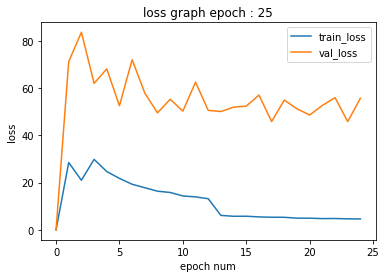

In [ ]:
plt.plot(train_losses, label = "train_loss")
plt.plot(val_losses, label = "val_loss")
plt.legend(); plt.xlabel("epoch num"); plt.ylabel("loss"); plt.title ( f"loss graph epoch : {len(train_losses)}")
plt.savefig ( os.path.join ( root_out_path,"Images", f"loss_graph_{len(train_losses)}.png" ) ) 
plt.show() 

In [ ]:
#---------------
# test on images
#---------------

# while training the input hybrid of 6 channels
# was composed by first 3 channels from background image
# and last 3 channels from true imageṇ
from skimage import io 

def read ( image_filename, background_filename ):
    ''' read raw image and background image as input hybrid '''
    bg = io.imread ( background_filename )
    raw = io.imread ( image_filename )
    
    assert bg.ndim == 3 and raw.ndim == 3, "input is supposed to be of 6 channels"

    # make channel first
    bg = bg.transpose ( (2,0,1))
    raw = raw.transpose ( (2,0,1))

    # add batch axis and normalise and change dtype to float
    bg = bg[np.new_axis, :] )  / 255.0   
    raw = raw[np.new_axis, :] / 255.0 
    
    input_hybrid = torch.cat ( [ torch.tensor ( bg ), torch.tensor (raw) ], axis = 1 ) 
    return input_hybrid 

@torch.no_grad()
def forward(inputs):
    ''' returns a binary map'''
    output = net(inputs)
    output = output.detach().cpu().squeeze() 

    output[output >= 0.5 ] = 1
    output[ output < 0.5 ] = 0 
    return output 


from glob import glob 
import os 

def main( test_images_dir ):
    '''
    directory where test_images are stored
    - contain a folder named background
    - contain a folder names images 
    '''
    background_folder = os.path.join ( test_images_dir, "background" )    
    images_folder = os.path.join ( test_images_dir, "images")

    bg_image_file  = glob ( background_folder + "/*")[0] 
    images = glob ( images_folder + "/*") 

    for image_file in images:
        inputs = read ( image_file, bg_image_file ) 
        pred_mask = forward ( inputs )
        image = io.imread ( image_file )
        

In [ ]:
#--------- time check at different input shapes
#-----------------------------------------------

def timeTest():
    net.eval() 
    for s in [ 37, 224,]:
        image = torch.rand(10, 6, s, s ).cuda()
        tick = time.time()
        out = net ( image )
        tock = time.time()
        print(f'''
            time taken is : { tock - tick } 
            input size : {image.shape}
            output size : {out.shape}

            ''') 
    net.train() 
        
timeTest()


            time taken is : 0.003214597702026367 
            input size : torch.Size([10, 6, 37, 37])
            output size : torch.Size([10, 37, 37])

            

            time taken is : 0.0034532546997070312 
            input size : torch.Size([10, 6, 224, 224])
            output size : torch.Size([10, 224, 224])

            


In [ ]:
path = os.path.join ( root_out_path, "1", "4")
os.makedirs ( path )

In [ ]:
>>> import cv2
>>> flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
>>> for i in range(len(flags)):
        x = flags[i]
        if x.find("BGR2RGB") != -1:
            print(x)

COLOR_BGR2RGB
COLOR_BGR2RGBA
